In [17]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# url to scrape
URL_TOI = "https://timesofindia.indiatimes.com/"

## Loading Web Pages with 'requests'

In [19]:
# using get function from requests library, which request a response object
res = requests.get(URL_TOI)

In [20]:
# checking the status code of the response
# if status code is 200, then we are good to go.
res.status_code

200

In [21]:
# Checking the content of the page.
#
# The content will be in the test form, we are gonig 
# to parse the test to beautifull soup library for
# extracting data.

res.text

'<!doctype html><html class="no-js" lang="en"><head><meta charSet="utf-8"/><meta http-equiv="x-ua-compatible" content="ie=edge"/><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1"/><title>News - Latest News, Breaking News, Bollywood, Sports, Business and Political News | Times of India</title><meta name="description" content="Top News in India: Read Latest News on Sports, Business, Entertainment, Blogs and Opinions from leading columnists. Times of India brings the Breaking News and Latest News Headlines from India and around the World."/><meta name="keywords" content="News, Breaking news, Latest news, Live news, Today news, News Today, India news, English news, Politics news, Top news in India"/><link rel="canonical" href="https://timesofindia.indiatimes.com/"/><link rel="alternate" href="https://timesofindia.indiatimes.com/us" hrefLang="en-us"/><link rel="alternate" href="https://timesofindia.indiatimes.com" hrefLang="en-IN"/><link rel="alternate" hr

## Extracting title with Beautifull Soup

In [22]:
# the content we required is in the Bytes form, in the response instance `res`
type(res.content)

bytes

In [23]:
# parse the content to `BeautifulSoup` class, for extracting the title

soup = BeautifulSoup(res.content, 'html.parser')

In [24]:
# here we get the title of the page.

soup.title.text

'News - Latest News, Breaking News, Bollywood, Sports, Business and Political News | Times of India'

Let's try to filter all the link tags and validate if the links are valid.

In [25]:
# get all the links from the page.

allLinkTag = soup.findAll('a')
# allLinkTag

In [26]:
# storing all the href (url) value in the in the unverified list\

unverified = []
for link in allLinkTag:
    unverified.append(link.attrs['href'])

In [27]:
# here are are going the validate the urls

import validators

validUrls = []
inValidUrls = []

for url in unverified:
    if validators.url(url):
        validUrls.append(url)
    else:
        inValidUrls.append(url)

print(len(validUrls), len(inValidUrls))

770 2


In [28]:
from collections import Counter

urlsCounter = Counter(validUrls)

In [29]:
urlsCounterMap = {}
for url, count in urlsCounter.items():
    urlsCounterMap[url] = count

urlsCounterMap
        

{'https://timesofindia.indiatimes.com/': 2,
 'https://timesofindia.indiatimes.com/us': 1,
 'https://epaper.indiatimes.com/timesepaper/publication-the-times-of-india,city-delhi.cms?redirectionSource=TOIWeb': 3,
 'https://timesofindia.indiatimes.com': 1,
 'https://timesofindia.indiatimes.com/toi-plus': 2,
 'https://timesofindia.indiatimes.com/videos': 2,
 'https://timesofindia.indiatimes.com/city': 3,
 'https://timesofindia.indiatimes.com/city/mumbai': 3,
 'https://timesofindia.indiatimes.com/city/delhi': 2,
 'https://timesofindia.indiatimes.com/city/bangalore': 1,
 'https://timesofindia.indiatimes.com/city/hyderabad': 1,
 'https://timesofindia.indiatimes.com/city/kolkata': 1,
 'https://timesofindia.indiatimes.com/city/chennai': 3,
 'https://timesofindia.indiatimes.com/city/agra': 1,
 'https://timesofindia.indiatimes.com/city/agartala': 1,
 'https://timesofindia.indiatimes.com/city/ahmedabad': 1,
 'https://timesofindia.indiatimes.com/city/ajmer': 1,
 'https://timesofindia.indiatimes.com/

In [30]:
inValidUrls

['/toi-plus', 'javascript: void(0)']

In [31]:
res.url + inValidUrls[0]

'https://timesofindia.indiatimes.com//toi-plus'

In [37]:
# creating pandas DataFrames
data = {"site": [], "counter": []}
for url, count in urlsCounter.items():
    data["site"].append(url)
    data["counter"].append(count)
df = pd.DataFrame(data)
df

,site,counter
0,https://timesofindia.indiatimes.com/,2
1,https://timesofindia.indiatimes.com/us,1
2,https://epaper.indiatimes.com/timesepaper/publ...,3
3,https://timesofindia.indiatimes.com,1
4,https://timesofindia.indiatimes.com/toi-plus,2
...,...,...
637,https://timesofindia.indiatimes.com/city/puduc...,1
638,https://timesofindia.indiatimes.com/entertainm...,1
639,https://timesofindia.indiatimes.com/india/brev...,1
640,https://timesofindia.indiatimes.com/entertainm...,1


<Axes: xlabel='Website', ylabel='occurrence on page'>

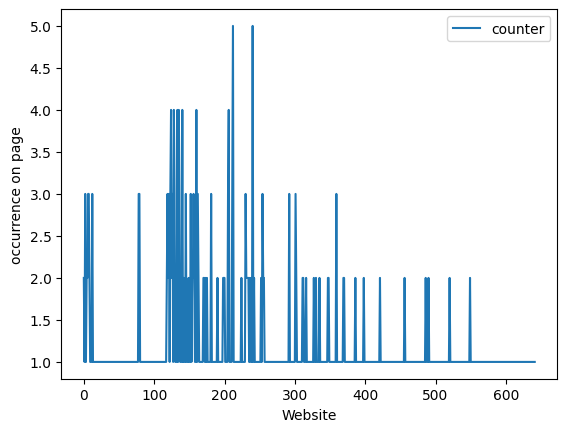

In [42]:
df.plot(xlabel="Website", ylabel="occurrence on page")